#Paquetes necesarios

In [67]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

(633, 800, 3)


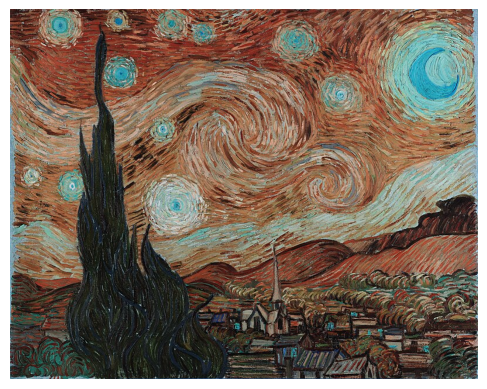

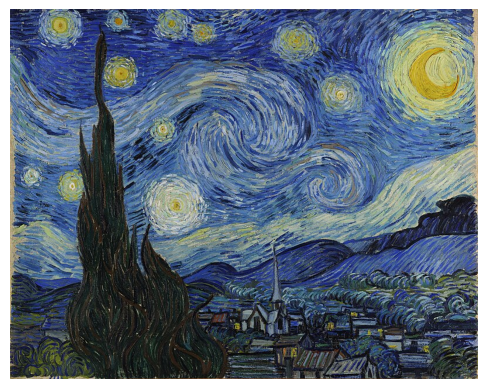

In [91]:
#Lee imagen de archivo
img = cv2.imread('noche-estrellada.jpg') 
#Muestra dimensiones
print(img.shape)
#Mostramos la original
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img) 
plt.show()

#OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Muestra la imagen tras convertir a RGB
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a grises para procesar

(633, 800)


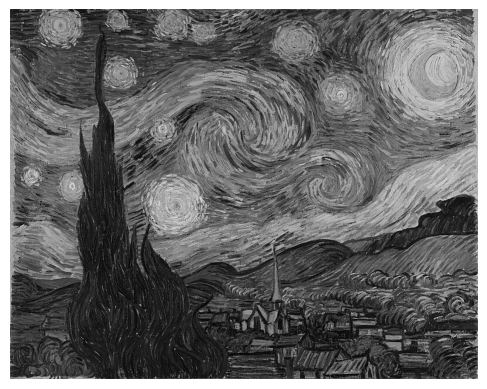

In [92]:
#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de bordes multietapa. Tratado en el tema 4

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0 255   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0   0   0]]


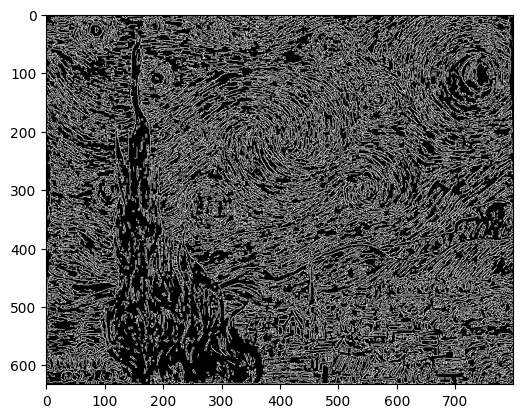

In [93]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
print(canny)
#Muestra resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Definida la imagen de salida de Canny, salida 0 o 255, obtiene el número de píxeles no nulos por columna y visualiza

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

Número máximo de píxeles blancos por fila: 350.0
Número máximo de píxeles blancos por columna: 231.0
Número de filas con más del 95% del máximo: 1
Número de columnas con más del 95% del máximo: 5


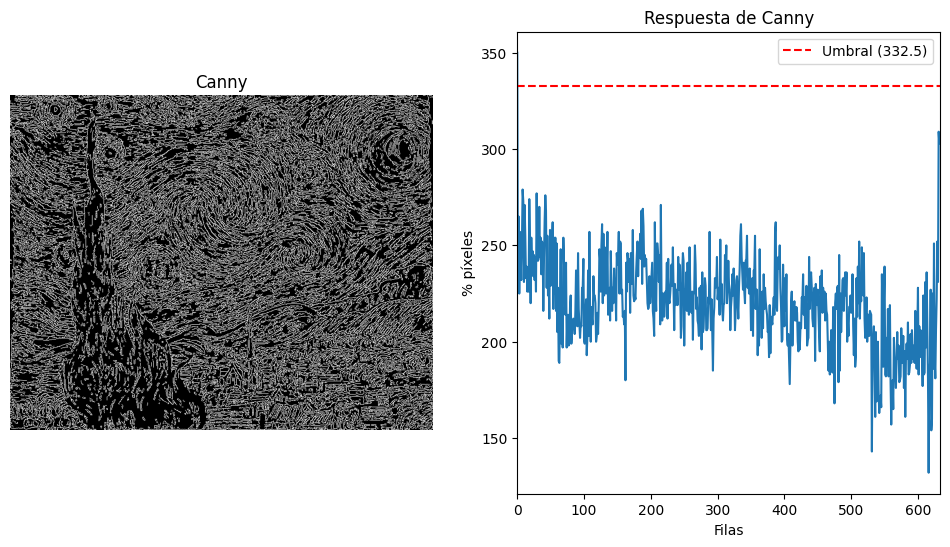

In [103]:
# Cuenta el número de píxeles blancos (255) por columna
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila y columna
rows = row_counts[:, 0] / 255
cols = col_counts[0, :] / 255

# Encuentra el máximo número de píxeles blancos por fila y columna
max_row_value = np.max(rows)
max_col_value = np.max(cols)

# Calcula el umbral para considerar valores significativos (95% del máximo)
threshold_row = 0.95 * max_row_value
threshold_col = 0.95 * max_col_value

# Cuenta cuántos valores superan el umbral en filas y columnas
count_significant_rows = np.sum(rows > threshold_row)
count_significant_cols = np.sum(cols > threshold_col)

# Muestra los resultados
print(f"Número máximo de píxeles blancos por fila: {max_row_value}")
print(f"Número máximo de píxeles blancos por columna: {max_col_value}")
print(f"Número de filas con más del 95% del máximo: {count_significant_rows}")
print(f"Número de columnas con más del 95% del máximo: {count_significant_cols}")

# Muestra dichas cuentas gráficamente
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.axhline(y=threshold_row, color='r', linestyle='--', label=f"Umbral ({threshold_row})")
plt.legend()
plt.xlim([0, canny.shape[0]])
plt.show()





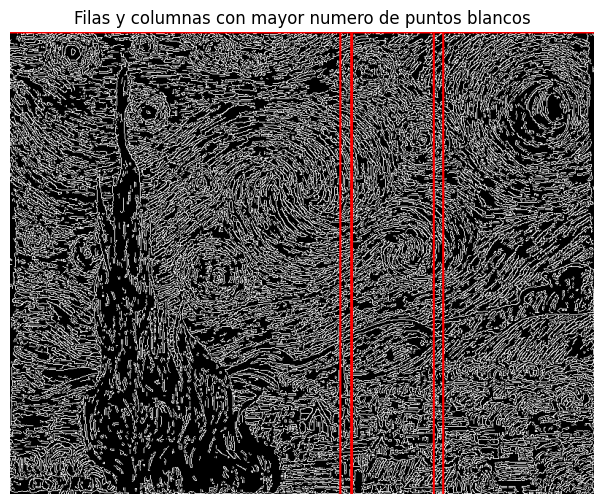

In [104]:
significant_rows = np.where(rows > threshold_row)[0]
significant_cols = np.where(cols > threshold_col)[0]

# Crea una copia de la imagen para remarcar las filas y columnas
image_with_lines = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

# Dibuja líneas rojas en las filas significativas
for row in significant_rows:
    cv2.line(image_with_lines, (0, row), (image_with_lines.shape[1], row), (0, 0, 255), 2)

# Dibuja líneas rojas en las columnas significativas
for col in significant_cols:
    cv2.line(image_with_lines, (col, 0), (col, image_with_lines.shape[0]), (0, 0, 255), 2)


# Muestra la imagen con las líneas resaltadas
plt.figure(figsize=(12, 6))
plt.title("Filas y columnas con mayor numero de puntos blancos")
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproximar el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1]

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

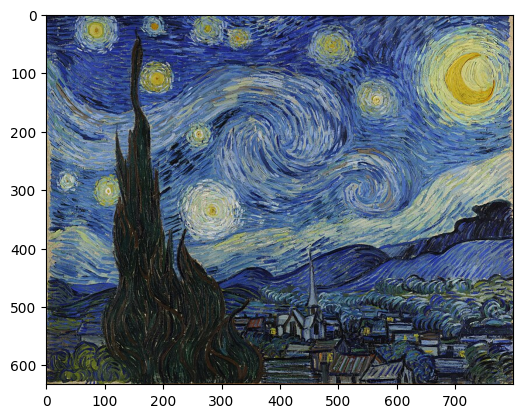

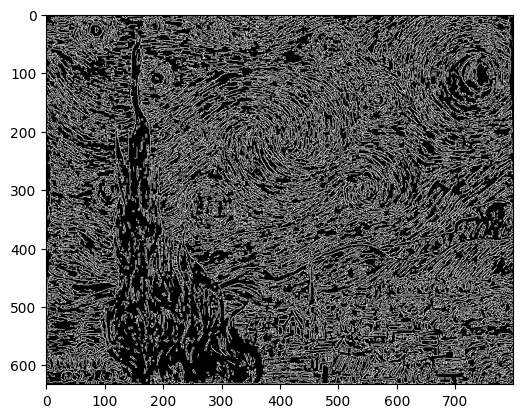

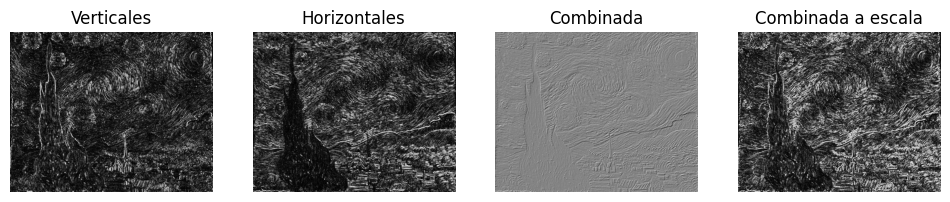

In [72]:
img2 = cv2.imread('noche-estrellada.jpg') 
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#Muestra la imagen tras convertir a RGB
plt.imshow(img_rgb) 
plt.show()

#convertimos la imagen a grises
gris2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris2, 100, 200)
plt.imshow(canny, cmap='gray') 
plt.show()

# Gaussiana para suavizar la imagen original
ggris2 = cv2.GaussianBlur(gris2, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris2, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris2, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 4, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 4, 3)
plt.axis("off")
plt.title('Combinada')

plt.imshow(sobel, cmap='gray') #Sin convertir escala

plt.subplot(1, 4, 4)
plt.axis("off")
plt.title('Combinada a escala')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
plt.show()



TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Número máximo de píxeles blancos por fila (Sobel): 350.0
Número máximo de píxeles blancos por columna (Sobel): 231.0
Filas con más del 95% del máximo (Sobel): [0]
Columnas con más del 95% del máximo (Sobel): [452 467 468 580 593]


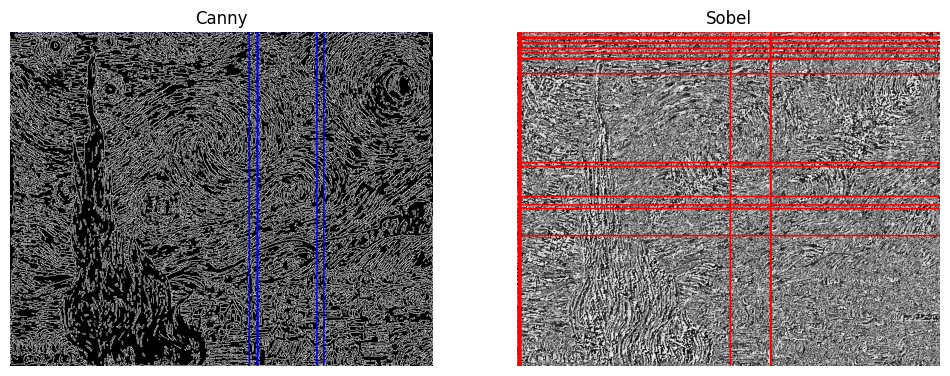

In [107]:

# Carga la imagen en escala de grises
image = cv2.imread('noche-estrellada.jpg', cv2.IMREAD_GRAYSCALE)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris2, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris2, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Convierte la imagen de salida a 8 bits
sobel8 = np.uint8(sobel)

# Aplica umbralizado a la imagen de Sobel
threshold_value = 100 
sobel_thresholded = cv2.threshold(sobel8, threshold_value, 255, cv2.THRESH_BINARY)[1]

# Realiza el conteo por filas y columnas
row_counts2 = cv2.reduce(sobel_thresholded, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts2 = cv2.reduce(sobel_thresholded, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al valor máximo del píxel (255)
rows2 = row_counts2[:, 0] / 255
cols2 = col_counts2[0, :] / 255

# Encuentra el máximo número de píxeles blancos por fila y columna
max_row_value2 = np.max(rows2)
max_col_value2 = np.max(cols2)

# Calcula el umbral para considerar valores significativos (95% del máximo)
threshold_row2 = 0.95 * max_row_value2
threshold_col2 = 0.95 * max_col_value2

# Encuentra las filas y columnas por encima del umbral
significant_rows2 = np.where(rows2 > threshold_row2)[0]
significant_cols2 = np.where(cols2 > threshold_col2)[0]

# Crea una copia de la imagen para remarcar las filas y columnas
image_with_lines2 = cv2.cvtColor(sobel8, cv2.COLOR_GRAY2BGR)

# Dibuja líneas rojas en las filas significativas
for row in significant_rows2:
    cv2.line(image_with_lines2, (0, row), (image_with_lines2.shape[1], row), (0, 0, 255), 2)

# Dibuja líneas rojas en las columnas significativas
for col in significant_cols2:
    cv2.line(image_with_lines2, (col, 0), (col, image_with_lines2.shape[0]), (0, 0, 255), 2)

# Muestra los resultados
print(f"Número máximo de píxeles blancos por fila (Sobel): {max_row_value}")
print(f"Número máximo de píxeles blancos por columna (Sobel): {max_col_value}")
print(f"Filas con más del 95% del máximo (Sobel): {significant_rows}")
print(f"Columnas con más del 95% del máximo (Sobel): {significant_cols}")

# Muestra la imagen con las líneas resaltadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(image_with_lines, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Sobel")
plt.imshow(cv2.cvtColor(image_with_lines2, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.

In [74]:
import cv2

vid = cv2.VideoCapture(0)

# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

# Inicializa el fotograma anterior
frame_anterior = None

while True:
    # Captura el fotograma actual
    ret, frame = vid.read()

    if ret:
        framehsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        #verdebajo = np.array([45, 50, 50], np.uint8)
        #verdealto = np.array([65, 255, 255], np.uint8)
        azulbajo = np.array([100, 50, 50], np.uint8)
        azulalto = np.array([130, 255, 255], np.uint8)
        mascara = cv2.inRange(framehsv, azulbajo, azulalto)
        
        contornos,_ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            


        for c in contornos:
            area = cv2.contourArea(c)
            if (area > 1000):
                x,y,w,h = cv2.boundingRect(c)
                cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),2)
                logo = cv2.imread('logo-opencv.png')
                # Escala el logo para que coincida con las dimensiones del rectángulo
                logo = cv2.resize(logo, (w, h))
                # Superpone el logo en la región del rectángulo
                frame[y:y + h, x:x + w] = cv2.addWeighted(frame[y:y + h, x:x + w], 1, logo, 0.5, 0)
        
        cv2.imshow('Video entrada', frame)
        cv2.imshow('Video binarizado', mascara)

   
        # Detener el bucle al presionar ESC
        if cv2.waitKey(20) == 27:
            break

# Liberar el objeto de captura
vid.release()

# Destruir ventanas
cv2.destroyAllWindows()



TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

In [75]:
def popart(video):

    vid = video

    #Dimensiones de la cámara
    w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

    #Fuerzo a mitad de resolución para ocupar menos pantalla
    w=int(w/2)
    h=int(h/2)
    vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
    vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

    #Imagen conjunta 2x original
    collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
    tl = collage[0:h,0:w]
    tr = collage[0:h,w:w+w]
    bl = collage[h:h+h,0:w]
    br = collage[h:h+h,w:w+w]

    lower = np.array([10, 20, 89]) #azul oscuro
    upper = np.array([120, 255, 255]) #azul claro

    while True:      
        # fotograma a fotograma
        ret, frameIN = vid.read()

        #Menor tamaño
        frame1 = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)    

        frame2 = cv2.inRange(frame1, lower, upper)

        frame = cv2.bitwise_not(frame2)
        #plt.imshow(mask) 
        if ret:
            #Separamos canales
            bgr_channels = cv2.merge([frame2, frame2 + 55, frame2])
            collage[0:h,0:w] = bgr_channels

            bgr_channels = cv2.merge([frame2, frame2 + 55, frame2 - 76])
            collage[0:h,w:w+w] = bgr_channels

            bgr_channels = cv2.merge([frame2, frame2 + 155, frame2 - 45])
            bl = collage[h:h+h,0:w]= bgr_channels

            bgr_channels = cv2.merge([frame2, frame2 + 175, frame2 + 75])
            br = collage[h:h+h,w:w+w] = bgr_channels

        
            # Muestra composicion
            cv2.imshow('Cam', collage)
        
        # Detenemos pulsado ESC
        if cv2.waitKey(20) == 27:
            break

def seguimientoDeObjetos(video):

    vid = cv2.VideoCapture(0)

    # Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
    eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

    # Inicializa el fotograma anterior
    frame_anterior = None

    while True:
        # Captura el fotograma actual
        ret, frame = video.read()

        if ret:
            framehsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            #verdebajo = np.array([45, 50, 50], np.uint8)
            #verdealto = np.array([65, 255, 255], np.uint8)
            azulbajo = np.array([100, 50, 50], np.uint8)
            azulalto = np.array([130, 255, 255], np.uint8)
            mascara = cv2.inRange(framehsv, azulbajo, azulalto)
            
            contornos,_ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                


            for c in contornos:
                area = cv2.contourArea(c)
                if (area > 1000):
                    x,y,w,h = cv2.boundingRect(c)
                    cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),2)
                    logo = cv2.imread('logo-opencv.png')
                    # Escala el logo para que coincida con las dimensiones del rectángulo
                    logo = cv2.resize(logo, (w, h))
                    # Superpone el logo en la región del rectángulo
                    frame[y:y + h, x:x + w] = cv2.addWeighted(frame[y:y + h, x:x + w], 1, logo, 0.5, 0)
            
            cv2.imshow('Video entrada', frame)
            cv2.imshow('Video binarizado', mascara)

    
            # Detener el bucle al presionar ESC
            if cv2.waitKey(20) == 27:
                break 

name = "normal"
pframe = 0
vid = cv2.VideoCapture(0)
tecla = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    tecla2 = cv2.waitKey(10)
    if(tecla2 != -1): tecla = tecla2
    if ret:
        
        cv2.imshow('Cam', frame)
        # Muestra resultado
        if tecla == 50:
            tecla = popart(vid)
        if tecla == 49:
            tecla = seguimientoDeObjetos(vid)


   
    # Detenemos pulsado ESC

    
    pframe = frame.copy()
    if tecla == 27:
        break


vid.release()
# Destruye ventanas
cv2.destroyAllWindows()